In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, PredictionErrorDisplay, accuracy_score, auc, classification_report

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

rng = np.random.RandomState(42)


In [3]:
wine_df = pd.read_csv('DS\wine.csv')

Text(0.5, 1.0, 'Wines per class')

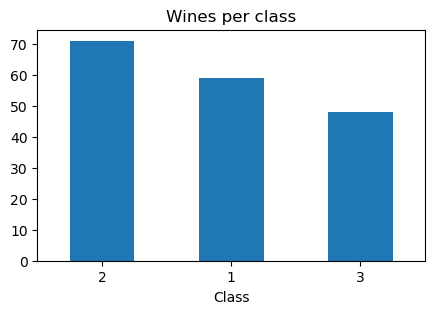

In [4]:
plt.figure(figsize=(5,3))
wine_df["Class"].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Wines per class')

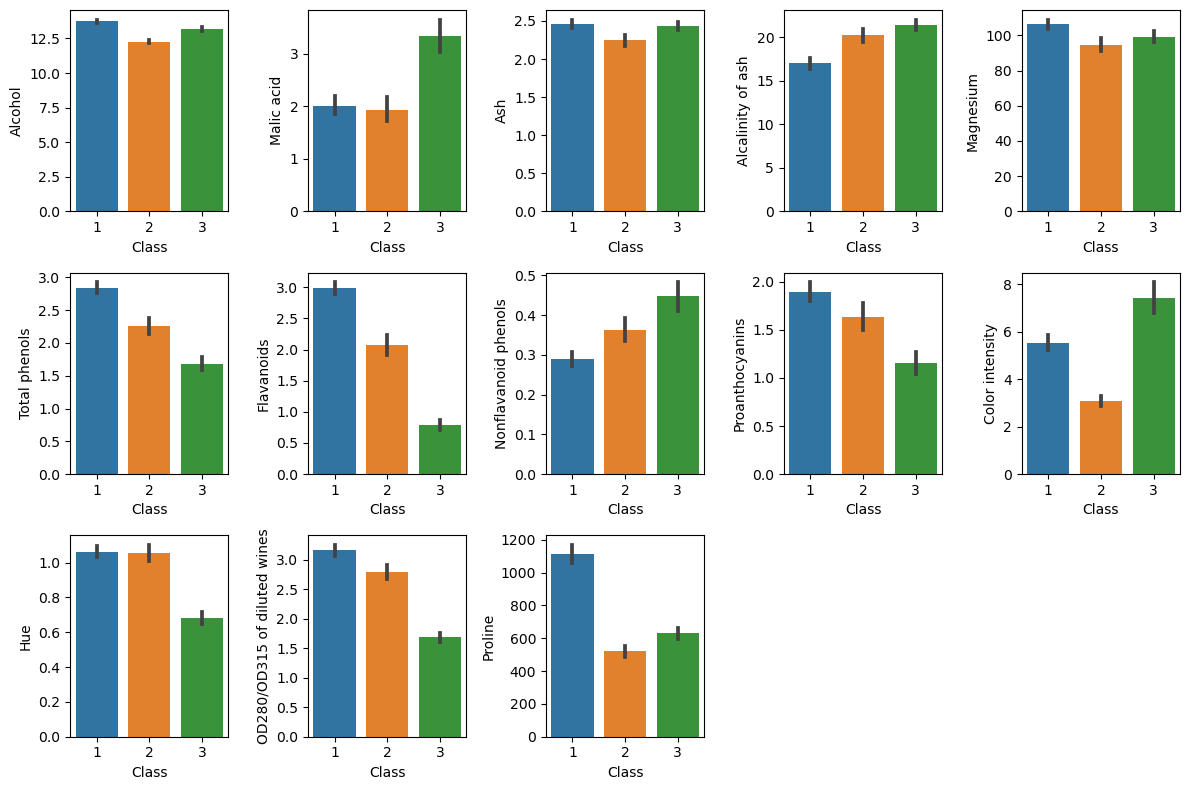

In [5]:
plt.figure(figsize=(12,8))
l=["Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
for i in l:
    plt.subplot(3, 5, l.index(i) + 1) 
    sns.barplot(x=wine_df["Class"],y=wine_df[i])
plt.tight_layout()

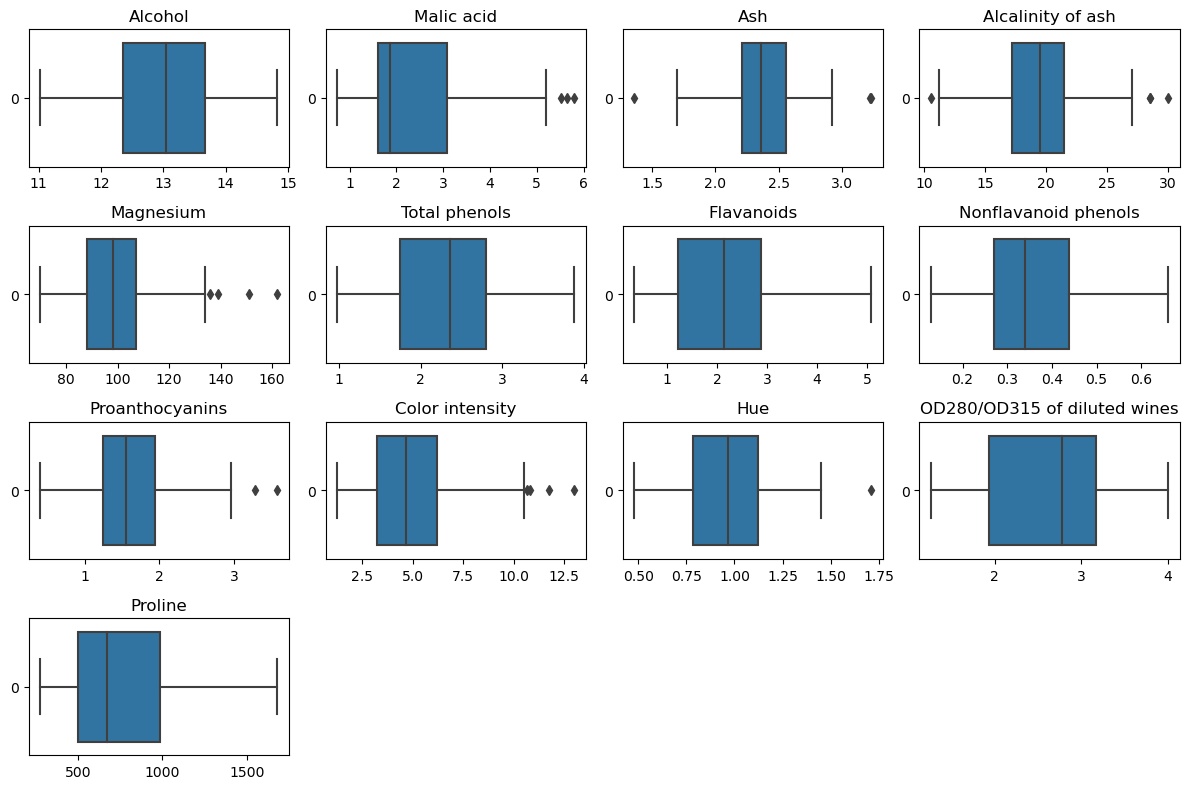

In [6]:
plt.figure(figsize=(12,8))
for i in l:
    plt.subplot(4, 4, l.index(i) + 1) 
    sns.boxplot(data=wine_df[i], orient='h')  # 'orient' is set to 'h' for horizontal box plots
    plt.title(i)
plt.tight_layout()
#plt.xlabel('Values')

Text(0.5, 1.0, 'Correlation Map')

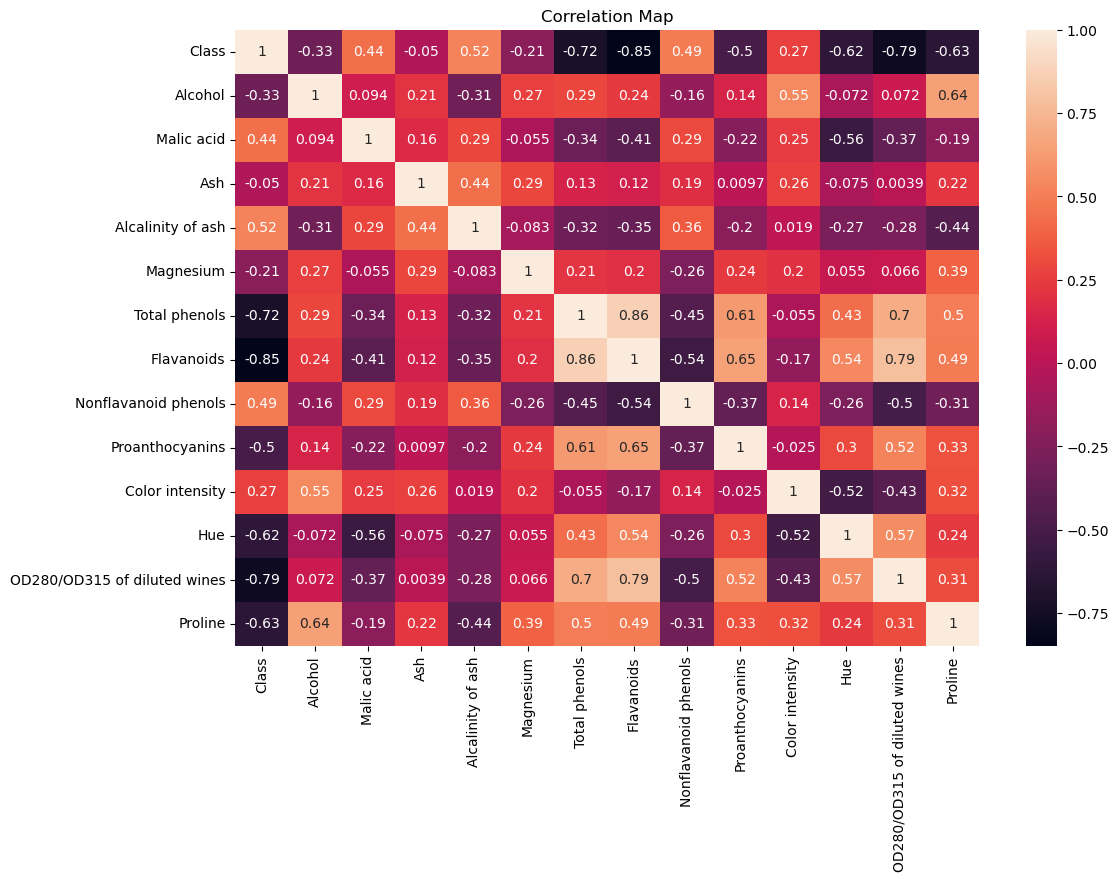

In [7]:
plt.figure(figsize=(12, 8), )
cor=wine_df.corr()
sns.heatmap(cor,annot=True, )
plt.title("Correlation Map")

Split Dpendent and Independent Variables (x=data, y=class)

In [8]:
y=wine_df.iloc[:,0]
x=wine_df.iloc[:,1:14]
x.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

SMOTE

In [9]:
smote = SMOTE(sampling_strategy='auto', random_state=rng)
x_resampled, y_resampled = smote.fit_resample(x, y)

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

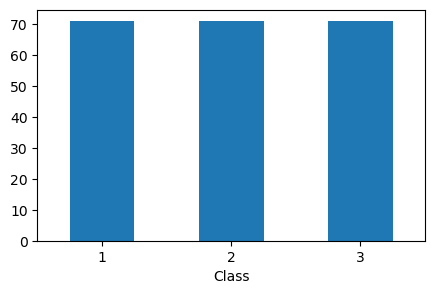

In [10]:
plt.figure(figsize=(5,3))
y_resampled.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [11]:
print("Total ammount of wines is", y_resampled.value_counts().sum())
print(y_resampled.value_counts())

Total ammount of wines is 213
Class
1    71
2    71
3    71
Name: count, dtype: int64


Train, test and split (75/25)

In [60]:
x_resampled_train,x_resampled_test,y_resampled_train,y_resampled_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=rng)

StratifiedKFold Random Forest

In [62]:
n= y_resampled.value_counts().sum()
splits = int(n/(n*0.3))

RF = RandomForestClassifier(random_state=rng)
sk_folds = StratifiedKFold(shuffle=True, n_splits = splits, random_state=rng)

y_resampled_pred = cross_val_predict(RF, x_resampled, y_resampled, cv = sk_folds)

rf_score = cross_val_score(RF, x_resampled, y_resampled, cv = sk_folds)

print("accuracy:", rf_score.mean()*100, "%")
print(classification_report(y_resampled, y_resampled_pred))
rf_matrix = confusion_matrix(y_resampled,y_resampled_pred)
print(rf_matrix)

accuracy: 98.12206572769954 %
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        71
           2       1.00      0.94      0.97        71
           3       0.96      1.00      0.98        71

    accuracy                           0.98       213
   macro avg       0.98      0.98      0.98       213
weighted avg       0.98      0.98      0.98       213

[[71  0  0]
 [ 1 67  3]
 [ 0  0 71]]
